#### En este Notebook tiene como objetivo, analizar la base datos que se usara para entrenar el modelo que predecira la calidad del vino, se limpiaran, se haran las procesamientos necesarios para el analisis de los datos.

### ***Variables***
### **fixed acidity**, **volatile acidity**, **citric acid**:
#### La acidez de un vino desempeña un papel importante en el sabor general de un vino, ya que una acidez demasiado baja o demasiado alta da como resultado un vino demasiado plano o ácido, respectivamente.
### **residual sugar**:
#### Los azúcares residuales son los azúcares que quedan en el vino después de que el zumo de uva se haya convertido en alcohol durante el proceso de fermentación.
### **chlorides**:
#### La salinidad de un vino puede medirse por el nivel de cloruros o de iones de sodio en el vino y afecta a la forma en que una persona percibe el dulzor y la acidez de un vino.
### **free sulfur dioxide**, **total sulfur dioxide**:
#### La salinidad de un vino puede medirse por el nivel de cloruros o de iones de sodio en el vino y afecta a la forma en que una persona percibe el dulzor y la acidez de un vino.
### **density**:
#### La densidad en un vino se utiliza frecuentemente para medir el nivel de azúcar residual en un vino. Dado que la densidad pretende medir el nivel de sólidos que permanecen en el agua, se puede utilizar la densidad para medir el nivel de partículas de azúcar que permanecen en el zumo de uva durante o después de la fermentación. 
### **pH**:
#### Los niveles de pH de un vino determinan básicamente su acidez, pero también son importantes para controlar la estabilidad microbiana y preservar la calidad del vino.
### **sulphates**:
#### Los sulfatos difieren de los dióxidos de azufre discutidos anteriormente en que están presentes de forma natural en el vino y pueden convertirse en dióxidos de azufre. Algunas personas pueden experimentar alergias o sensibilidades negativas a los sulfatos, lo que provoca dolores de cabeza u otros síntomas.
### **alcohol**:
#### Un vino con mayor contenido alcohólico tiende a presentar más cuerpo e intensidad, mientras que los vinos con menor graduación alcohólica suelen ser más ligeros y refrescantes

### **quality**:
#### Una calificación entre el 0 y 10 que se le da al vino.

###### Fuentes: [winemakersacademy](https://winemakersacademy.com/), [Bodegas Marqués de Atrio](https://marquesdelatrio.com/blog/vino/graduacion-alcoholica/#:~:text=Por%20tanto%2C%20tal%20y%20como,ser%20m%C3%A1s%20ligeros%20y%20refrescantes.)

In [2]:
# Importamos las librebrias necesarias para el analisis

import pandas as pd
import numpy as np
import seaborn as sns 
sns.set_style("white")
import matplotlib.pyplot as plt

In [3]:
# Cargamos los datos

wines= pd.read_csv('../Data/winequality-white.csv', sep=';')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Mostramos la información de del dataset

wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Como podemos observar es un datset que no contiene nulos y todas las columnas son del tipo de variable correspondiente, por que pasamos hacer una exploración.

In [5]:
# Primero veamos las estadisticas basicas del dataset

wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [43]:
wines['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

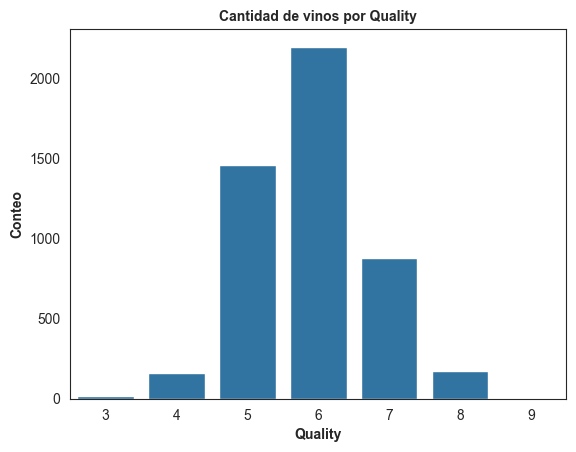

In [6]:
# Procedemos hacer un grafico de barras para observar como se destribuye la variable quality en el dataset

# Definimos el tipo de grafico, con un countplot contamos las observaciones que hay por cada numero de quality
sns.countplot(data= wines, x= 'quality')

# Definimos las etiquetas
plt.ylabel('Conteo', fontsize= 10, fontweight='bold')
plt.xlabel('Quality', fontsize= 10, fontweight='bold')
plt.title('Cantidad de vinos por Quality',fontsize= 10, fontweight='bold')

# Mostramos el grafico 
plt.show()

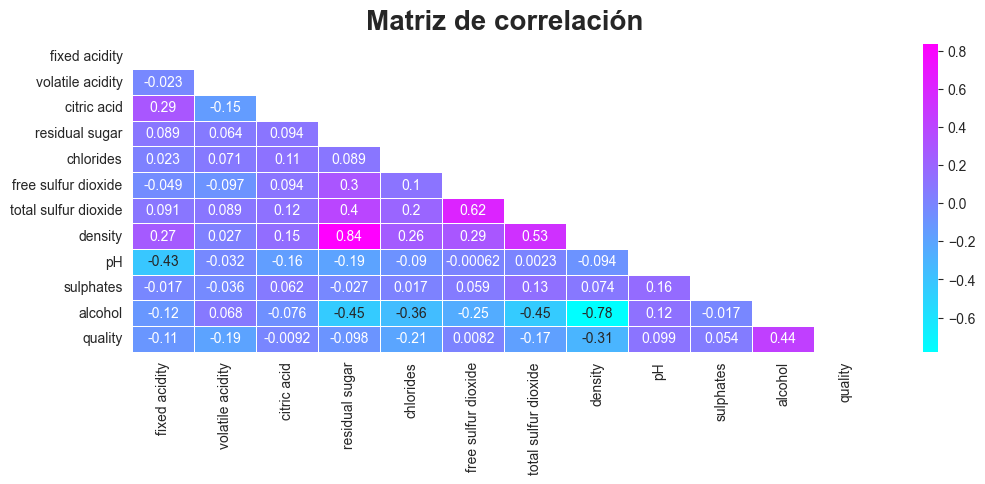

In [7]:
# Como el obejtivo es usar un modelo que nos ayude a predecir la calidad basada en estas caracteristicas
# Observemos las correlaciones que tienen las features con nuestra target

# Definimos el tamaño de la grafica 
plt.figure(figsize=(12,4))

# Definimos un mascara para aplicar a la matriz
mask = np.triu(np.ones_like(wines.corr(), dtype = bool)) # mask to cover top triangle of heatmap

# definimos el tipo de grafico a usar 
sns.heatmap(data= wines.corr(),annot=True, mask=mask, cmap='cool', linewidths=.5)

# Definimos las etiquetas del grafico
plt.title('Matriz de correlación', fontweight='bold', fontsize=20, ha='center', va='bottom')

# Mostramos el grafico 
plt.show()

#### Basandonos en la matriz de correlación podemos obervas que las variables con las correlaciones más son las siguientes:
#### **fixed acidity**, **volatile acidity**, **chlorides**, **total sulfur dioxide**, **density**, **alcohol**.
#### debido a esto veremos como se comportan estas variables con nuestro target de manera grafica.


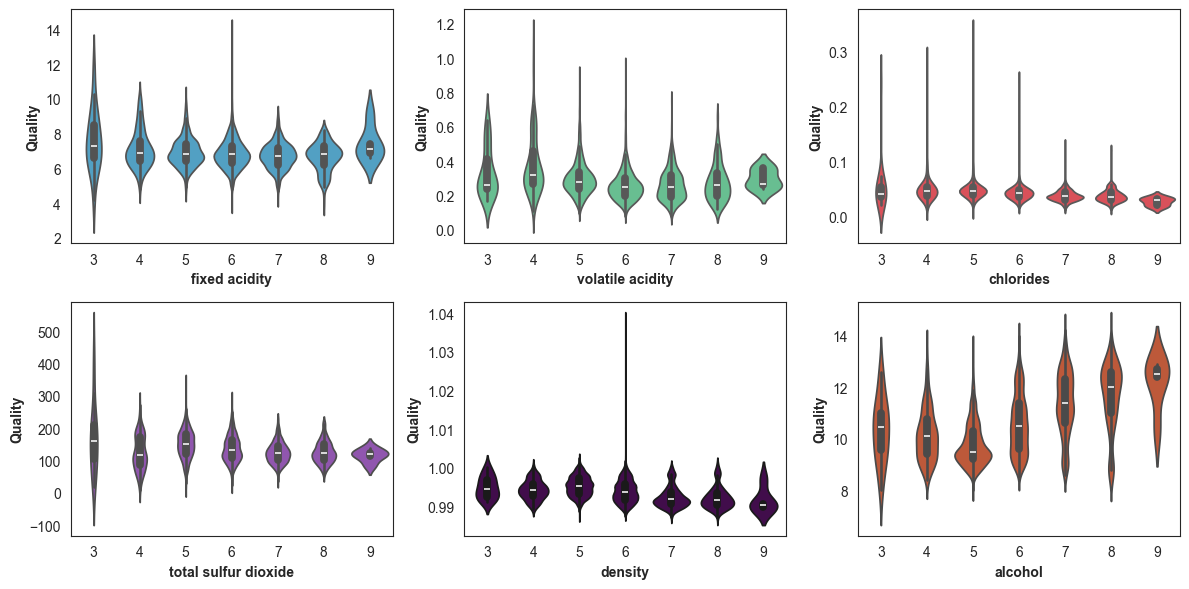

In [8]:
# Definimos las variabels y colores a usar en una lista
variables= ['fixed acidity','volatile acidity', 'chlorides', 'total sulfur dioxide', 'density','alcohol']
colors= ['#3FA7D6','#59CD90','#F03A47','#9448BC','#480355','#D34E24']
# Definimos el tmaño del grafico 
plt.figure(figsize=(12, 6))

# Con un for iteramos en la lista de variables  
for i,(variable,color) in enumerate(zip(variables,colors)):
    # Definimos las posiciones de cada subplot en las 
    plt.subplot(2,3,i+1)
    
    # Definimos el tipo de grafico 
    sns.violinplot(data= wines, y=variable, x= 'quality', color=color)
    
    # Definimos las etiquetas del grafico 
    plt.xlabel(variable,fontsize= 10, fontweight='bold')
    plt.ylabel('Quality',fontsize= 10, fontweight='bold')
    plt.tight_layout()


# Mostramos el grafico
plt.show()

#### Ya que hemos podido ver algo de las variables y su comportmiento relacionado con el target, pasamos a la parte de el modelo que vamos a usar para ese ejercicio, en este caso usaremos: 
#### - **Random forest**
#### Solo usaremos el random forest ya que como se puede obervar en las graficas, no es un conjuto de datos que sea linealmente separable, por lo que en este caso la regresion logitica no serviria.

In [21]:
# Importamos las librerias necesarias para el modelo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Definimos los datasets a usar, para este ejercicio entrenaremos los modelos con dos datasets:

# 1 con todas la variables.
# 2 con las variables con mas correlacion.
# Asi veremos cual da un mejor modelo.

# Datos completos
x= wines.drop('quality', axis= True)
y= wines['quality']

# Datos con las variables com más correlacion

x_corr= wines[variables]
y_corr= wines['quality']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.2)
x_train_corr,x_test_corr,y_train_corr,y_test_corr= train_test_split(x_corr,y_corr, test_size= 0.2, random_state=18)

# Mostramos las dimensione de las columnas

print('Dataset completo')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print('---------------')
print('Dataset con las variables com más correlacion')
print(x_train_corr.shape)
print(y_train_corr.shape)
print(x_test_corr.shape)
print(y_test_corr.shape)

Dataset completo
(3918, 11)
(3918,)
(980, 11)
(980,)
---------------
Dataset con las variables com más correlacion
(3918, 6)
(3918,)
(980, 6)
(980,)


In [28]:
# Inicializamos el modelo 
random= RandomForestClassifier()

# Enrtrenamos el modelo con los datos del primer dataset
random.fit(x_train,y_train)

# Predecimos con el modelo entrenado
y_predict_random= random.predict(x_test)


In [31]:
# Ahora importamos las metricas para evaluar los modelos 
from sklearn.metrics import accuracy_score

##### El **Accuracy** mide la proporción de predicciones correctas sobre el total de predicciones. Se define como la suma de los True Positive y los True Negative sobre el total de casos

In [55]:
# Imprimimos las metricas
print('Metricas para el radomforest')
print("Accuracy: ", round(accuracy_score(y_test,y_predict_random),3))

Metricas para el radomforest
Accuracy:  0.679


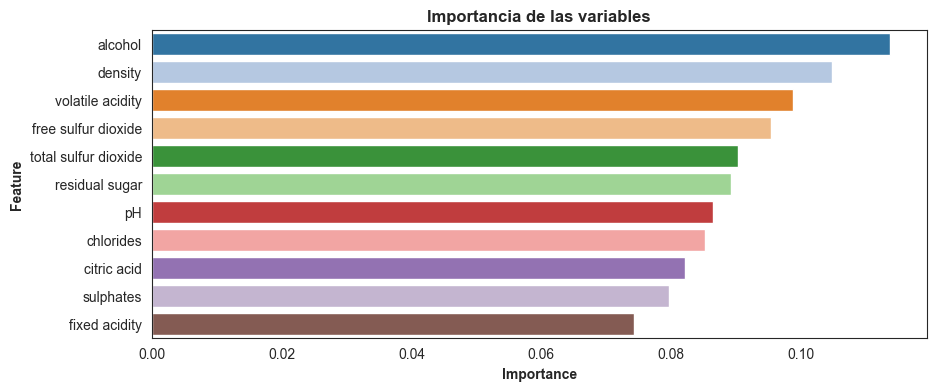

In [71]:
# Dentro del algoritmo de RandomForest hay un apartado que se denomina Feature importances
# Este es un calculo que hace el mismo algoritmo para definir la importancia de la variable para la predicción 
feature_importances = [(name, score) for name, score in zip(list(x_test), random.feature_importances_)]
feature_importances= pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])
feature_importances['Importance']= feature_importances['Importance'].apply( lambda x: round(x,5))

# Hacemos un grafico de barras con las varibles mas importantes
plt.figure(figsize=(10,4))

sns.set_style("white")
sns.barplot(data= feature_importances.sort_values(by='Importance',ascending=False), y='Feature',  x= 'Importance', hue= 'Feature', palette="tab20")
plt.xlabel("Importance",fontweight="bold")
plt.ylabel("Feature",fontweight="bold")
plt.title("Importancia de las variables", fontweight="bold")
plt.show()

#### Los resultados anteriores son los que nos aroja el modelo usando todas las variables, a continuación realizaremos el mismo proceso pero el con dataset de las varaibles con mas correlacion.

In [68]:
# Inicializamos el modelo
random_corr= RandomForestClassifier()

# Enrtrenamos el modelo con los datos del segundo dataset
random_corr.fit(x_train_corr,y_train_corr)

# Predecimos con el modelo entrenado
y_predict_random_corr= random_corr.predict(x_test_corr)

In [69]:
# Imprimimos las metricas para el segundo modelo
print('Metricas para el radomforest del segundo modelo')
print("Accuracy: ", round(accuracy_score(y_test_corr,y_predict_random_corr),3))

Metricas para el radomforest del segundo modelo
Accuracy:  0.669


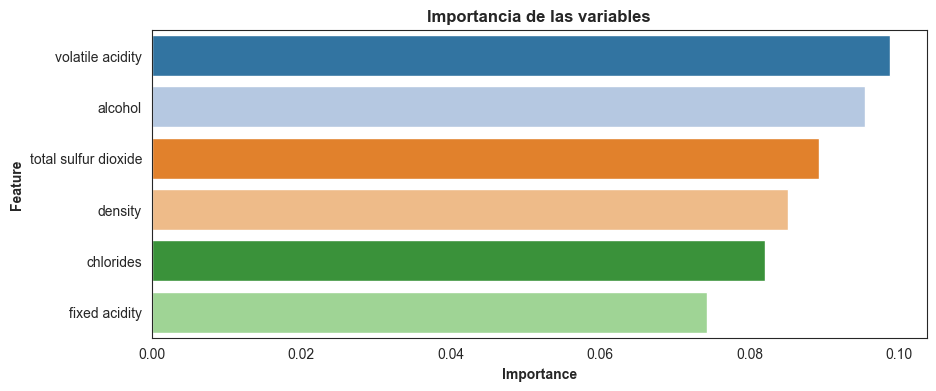

In [70]:
feature_importances = [(name, score) for name, score in zip(list(x_test_corr), random.feature_importances_)]
feature_importances= pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])
feature_importances['Importance']= feature_importances['Importance'].apply( lambda x: round(x,5))

# Hacemos un grafico de barras con las varibles mas importantes
plt.figure(figsize=(10,4))

sns.set_style("white")
sns.barplot(data= feature_importances.sort_values(by='Importance',ascending=False), y='Feature',  x= 'Importance', hue= 'Feature', palette="tab20")
plt.xlabel("Importance",fontweight="bold")
plt.ylabel("Feature",fontweight="bold")
plt.title("Importancia de las variables", fontweight="bold")
plt.show()

#### Como se puede observar en los resultados, que son bastante similares, el alcohol y volatile acidity, terminan siendo segun el modelo, las variables con mas influencia sobre la calidad del vino, estas conclusiones se llegan gracias a los datos que tenemos, pero al final tambien esta calidad se puede definir por el gusto particular de cada individuo.